# Tobig's 19기 2주차 Optimization 과제

# Gradient Descent 구현하기

### 1)"..."표시되어 있는 빈 칸을 채워주세요
### 2)강의내용과 코드에 대해 공부한 내용을 마크마운 또는 주석으로 설명해주세요

## 데이터

In [1]:
import pandas as pd
import numpy as np
import random

In [2]:
data = pd.read_csv('assignment_2.csv')
data.head()

,Label,bias,experience,salary
0,1,1,0.7,48000
1,0,1,1.9,48000
2,1,1,2.5,60000
3,0,1,4.2,63000
4,0,1,6.0,76000


## Train Test 데이터 나누기

In [3]:
from sklearn.model_selection import train_test_split

c:\Junho\envs\sudal\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 1:], data.iloc[:, 0], test_size = 0.25, random_state = 0)

In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150, 3), (50, 3), (150,), (50,))

## Scaling

experience와 salary의 단위, 평균, 분산이 크게 차이나므로 scaler를 사용해 단위를 맞춰줍니다. 

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
bias_train = X_train["bias"]
bias_train = bias_train.reset_index()["bias"]
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_train["bias"] = bias_train
X_train.head()

,bias,experience,salary
0,1,0.187893,-1.143335
1,1,1.185555,0.043974
2,1,-0.310938,-0.351795
3,1,-1.629277,-1.341220
4,1,-1.308600,0.043974


이때 scaler는 X_train에 fit 해주시고, fit한 scaler를 X_test에 적용시켜줍니다.  
똑같이 X_test에다 fit하면 안돼요!

In [7]:
bias_test = X_test["bias"]
bias_test = bias_test.reset_index()["bias"]
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_test["bias"] = bias_test
X_test.head()

,bias,experience,salary
0,1,-1.344231,-0.615642
1,1,0.508570,0.307821
2,1,-0.310938,0.571667
3,1,1.363709,1.956862
4,1,-0.987923,-0.747565


In [94]:
# parameter 개수 = 열의 개수
N = len(X_train.loc[0]) # 첫번째 행의 길이 
N

3

In [9]:
# 초기 parameter들을 임의로 설정해줍니다.
parameters = np.array([random.random() for i in range(N)])
random_parameters = parameters.copy()
parameters

array([0.17291932, 0.1438291 , 0.82290029])

### * LaTeX   

Jupyter Notebook은 LaTeX 문법으로 수식 입력을 지원하고 있습니다.  
LaTeX문법으로 아래의 수식을 완성해주세요  
http://triki.net/apps/3466  
https://jjycjnmath.tistory.com/117

## Dot product
## $z = X_i \theta$

In [114]:
def dot_product(X, parameters):
    z = 0
    for i in range(len(parameters)):
        z += X[i]*parameters[i]
    return z

## Logistic Function

## $p = \frac{1}{1+e^{-z}}$

In [115]:
def logistic(X, parameters):
    z = dot_product(X, parameters)
    p = 1 / (1 + np.exp(-z))
    return p

In [116]:
logistic(X_train.iloc[1], parameters)

0.5915109396557383

## Object function

Object Function : 목적함수는 Gradient Descent를 통해 최적화 하고자 하는 함수입니다.  
<br>
선형 회귀의 목적함수
## $l(\theta) = \frac{1}{2}\Sigma(y_i - \theta^{T}X_i)^2$  
참고) $\hat{y_i} = \theta^{T}X_i$
  
로지스틱 회귀의 목적함수를 작성해주세요  
(선형 회귀의 목적함수처럼 강의에 나온대로 작성해주세요. 평균을 고려하는 것은 뒤에 코드에서 수행합니다)
## $l(p) = -\sum y_i logp + (1-y_i)log(1-p)$

In [117]:
def minus_log_cross_entropy_i(X, y, parameters):
    p = logistic(X, parameters)
    loss =  -np.log(p) * y - np.log(1 - p) * (1 - y)
    return  loss

In [118]:
def mse_i(X, y, parameters):
    y_hat = np.dot(X,parameters.T)
    loss = ((y-y_hat)**2) /2
    return loss

In [119]:
def batch_loss(X_set, y_set, parameters, loss_function, n): #n:현재 배치의 데이터 수
    loss = 0
    for i in range(X_set.shape[0]):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        loss += loss_function(X,y,parameters)
    loss = loss/n #loss 평균값으로 계산
    return loss

In [120]:
X_test.shape

(50, 3)

In [121]:
batch_loss(X_test, y_test, parameters, minus_log_cross_entropy_i, len(X_test))

1.0093509600977038

## Gradient
위의 선형회귀의 목적함수 $l(\theta)$와 로지스틱회귀의 목적함수 $l(p)$의 gradient를 작성해주세요  
(위의 목적함수를 참고해서 작성해주세요 = 평균을 고려하는 것은 뒤에 코드에서 수행합니다)

## ${\partial\over{\partial \theta_j}}l(\theta)=   -\sum{(y_i-\theta^TX_i)}X_{ij}              $ 
## ${\partial\over{\partial \theta_j}}l(p)= -\sum(y_i-p_i)X_{ij} $

In [122]:
def get_gradient_ij(X, y, parameters, j, model):
    if model == 'linear':
        y_hat = np.dot(X,parameters.T)
        gradient = (y_hat - y) * X[j]
    else:
        p = logistic(X, parameters)
        gradient = (p - y) * X[j]
    return gradient

In [123]:
get_gradient_ij(X_train.iloc[0,:], y_train.iloc[0], parameters, 1, 'logistic')

-0.12715332763771928

In [20]:
from IPython.display import Image

Image("C:/Users/rhskr/Desktop/배치알고리즘_구현.png")

FileNotFoundError: No such file or directory: 'C:/Users/rhskr/Desktop/배치알고리즘_구현.png'

FileNotFoundError: No such file or directory: 'C:/Users/rhskr/Desktop/배치알고리즘_구현.png'

<IPython.core.display.Image object>

## Batch Gradient
하나의 배치 (X_set, y_set)에 대해 기울기를 구하는 코드를 작성해주세요

In [125]:
def batch_gradient(X_set, y_set, parameters, model):
    gradients = [0 for _ in range(len(parameters))]
    
    for i in range(len(X_set)):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        for j in range(len(parameters)):
            gradients[j] += get_gradient_ij(X, y, parameters, j, model)

    
    return gradients

In [126]:
gradients1 = batch_gradient(X_train, y_train, parameters, 'logistic')
gradients1

[37.79111252297798, 5.958998093038141, 43.270246528602485]

## mini-batch
인덱스로 미니 배치 나누기

In [127]:
def batch_idx(X_train, batch_size):
    N = len(X_train)
    nb = (N // batch_size)+1 #number of batch
    idx = np.array([i for i in range(N)])
    idx_list = [idx[i*batch_size:(i+1)*batch_size] for i in range(nb) if len(idx[i*batch_size:(i+1)*batch_size]) != 0]
    return idx_list

In [128]:
batch_idx(X_train,10)

[array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
 array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 array([30, 31, 32, 33, 34, 35, 36, 37, 38, 39]),
 array([40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 array([50, 51, 52, 53, 54, 55, 56, 57, 58, 59]),
 array([60, 61, 62, 63, 64, 65, 66, 67, 68, 69]),
 array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79]),
 array([80, 81, 82, 83, 84, 85, 86, 87, 88, 89]),
 array([90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109]),
 array([110, 111, 112, 113, 114, 115, 116, 117, 118, 119]),
 array([120, 121, 122, 123, 124, 125, 126, 127, 128, 129]),
 array([130, 131, 132, 133, 134, 135, 136, 137, 138, 139]),
 array([140, 141, 142, 143, 144, 145, 146, 147, 148, 149])]

batch_idx 함수에 대한 설명을 batch_size와 함께 간략하게 작성해주세요  
### 설명: "batch_idx 함수는 총 train 데이터를 batch_size로 나누어주고, 각각배치마다 X_train의 index가 들어가게끔 해주는 함수입니다. "

## Update Parameters
기울기를 갱신하는 코드를 작성해주세요  
(loss와 마찬가지로 기울기를 갱신할 때 배치 사이즈를 고려해 평균으로 갱신해주세요)

In [129]:
def step(parameters, gradients, learning_rate, n): #n:현재 배치의 데이터 수
    for i in range(len(parameters)):
        gradients[i] *= learning_rate/n
    
    parameters -= gradients
    return parameters

In [130]:
step(parameters, gradients1, 0.01, len(X_train))

array([0.16281326, 0.14221741, 0.81133419])

## Gradient Descent
위에서 작성한 함수들을 조합해서 경사하강법 함수를 완성해주세요

- learning_rate: 학습률  
- tolerance: Step이 너무 작아서 더 이상의 학습이 무의미할 때 학습을 멈추는 조건  
- batch: 기울기를 1번 갱신할 때 사용하는 데이터셋  
- epoch:  
- num_epoch:
<br>

BGD: "Batch Gradient Descent"  
SGD: "Stochastic Gradient Descent"  
MGD: "Mini-Batch Gradient Descent"  
<br>
batch_size에 따른 경사하강법의 종류를 적어주세요  
batch_size=1 -> "Stochastic Gradient Descent"  
batch_size=k -> "Mini-Batch Gradient Descent"  
batch_size=whole ->"Gradient Descent"  

In [150]:
def gradient_descent(X_train, y_train, learning_rate = 0.1, num_epoch = 1000, tolerance = 0.00000001, model = 'logistic', batch_size = 16):
    stopper = False
    
    N = len(X_train.iloc[0])
    print(N)
    parameters = np.random.rand(N)
    print(parameters)
    loss_function = minus_log_cross_entropy_i if model == 'logistic' else mse_i
    loss = 999
    batch_idx_list = batch_idx(X_train, batch_size)
    
    for epoch in range(num_epoch):
        if stopper:
            break
        for idx in batch_idx_list:
            X_batch = X_train.iloc[idx,]
            y_batch = y_train.iloc[idx]
            gradients = batch_gradient(X_batch, y_batch, parameters, loss_function)
            step(parameters, gradients, learning_rate, len(X_batch))
            new_loss = batch_loss(X_batch, y_batch, parameters, loss_function, len(X_batch))
            #중단 조건
            if abs(new_loss - loss) < tolerance:
                stopper = True
                break
            loss = new_loss
        
        #100epoch마다 학습 상태 출력
        if epoch%100 == 0: #출력이 길게 나오면 check point를 수정해도 됩니다.
            print(f"epoch: {epoch}  loss: {new_loss}  params: {parameters}  gradients: {gradients}")
    
    return parameters

## Implement
경사하강법 함수를 이용해 최적의 모수 찾아보세요. 학습을 진행할 때, Hyper Parameter를 바꿔가면서 학습시켜보세요.

## Logistic Regression

In [54]:
new_param_bgd = gradient_descent(X_train, y_train,batch_size=len(X_train))
new_param_bgd

epoch: 0  loss: 0.348348160214843  params: [0.20854101 0.8562011  0.41285901]  gradients: [0.025968361289943426, 0.012125244778357386, 0.030805427239562262]
epoch: 100  loss: 0.13996748910538542  params: [-0.85790469  1.00080496 -0.90221977]  gradients: [0.003404049919707075, -0.005452276758115596, 0.006208978453598833]
epoch: 200  loss: 0.12198591737547455  params: [-1.05531537  1.48591616 -1.39947676]  gradients: [0.0012483285042357536, -0.004197961568870548, 0.004121111508268794]
epoch: 300  loss: 0.11304908215662378  params: [-1.15643375  1.85171126 -1.75595008]  gradients: [0.0008566879366444723, -0.0032006080821340046, 0.0031029037156511253]
epoch: 400  loss: 0.10742981626738993  params: [-1.23325624  2.136594   -2.03124001]  gradients: [0.0006959303450295067, -0.002546480751169452, 0.002453002508199601]
epoch: 500  loss: 0.10354981384334773  params: [-1.29717205  2.36705494 -2.252664  ]  gradients: [0.0005887717791208241, -0.002092631251195499, 0.0020054249125305095]
epoch: 600 

array([-1.50826432,  3.09113162, -2.94089781])

In [99]:
new_param_sgd = gradient_descent(X_train, y_train, batch_size=1,learning_rate=0.1)
new_param_sgd

3
[0.20639648 0.30524508 0.63184026]
epoch: 0  loss: 0.28279310090461907  params: [-0.87048986  0.97757967 -1.1083477 ]  gradients: [0.025489831553049676, 0.013871590711380078, 0.01793440949050162]
epoch: 100  loss: 0.07736676481985012  params: [-1.93032515  4.17501795 -4.06768972]  gradients: [0.007538548165983837, 0.004102485122309154, 0.005304052696121032]
epoch: 200  loss: 0.07736266552580842  params: [-1.9303681   4.1751431  -4.06780374]  gradients: [0.007538159522209473, 0.00410227362199542, 0.005303779249959536]
epoch: 300  loss: 0.07736266518361763  params: [-1.9303681   4.17514311 -4.06780375]  gradients: [0.007538159489767171, 0.004102273604340288, 0.0053037792271334325]
epoch: 400  loss: 0.07736266518359017  params: [-1.9303681   4.17514311 -4.06780375]  gradients: [0.007538159489764571, 0.004102273604338872, 0.005303779227131603]
epoch: 500  loss: 0.07736266518359017  params: [-1.9303681   4.17514311 -4.06780375]  gradients: [0.007538159489764571, 0.004102273604338872, 0.00

array([-1.9303681 ,  4.17514311, -4.06780375])

In [156]:
new_param_mgd = gradient_descent(X_train, y_train,batch_size=16)
new_param_mgd

3
[0.66455117 0.12477086 0.51987857]
epoch: 0  loss: 1.0094294951932732  params: [0.31558962 0.11318988 0.28278132]  gradients: [0.05171764129707811, 0.04653492914425424, 0.06172747910113494]
epoch: 100  loss: 0.1992585165161076  params: [-1.55577081  3.05259625 -3.00103389]  gradients: [0.007424630412515577, 0.010925637515909296, 0.014566168731417554]
epoch: 200  loss: 0.16833216905582316  params: [-1.7715268   3.7397506  -3.64987846]  gradients: [0.006974866134015821, 0.010564995112762335, 0.013081330898586943]
epoch: 300  loss: 0.15733171005753002  params: [-1.86728791  4.03935849 -3.93029269]  gradients: [0.006856293262184913, 0.010445759585620775, 0.012558912188878413]
epoch: 400  loss: 0.15229140780420578  params: [-1.91565462  4.18982299 -4.07057345]  gradients: [0.0068098378925201, 0.010392905050963129, 0.012320715785445503]
epoch: 500  loss: 0.14973387086893933  params: [-1.94143502  4.26982028 -4.14501191]  gradients: [0.006788181814261984, 0.010366503897543905, 0.01220013376

array([-1.97155954,  4.36313306, -4.231716  ])

### Predict Label

In [143]:
y_predict = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], new_param_bgd)
    if p> 0.5 :
        y_predict.append(1)
    else :
        y_predict.append(0)
y_predict_random = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], random_parameters)
    if p> 0.5 :
        y_predict_random.append(1)
    else :
        y_predict_random.append(0)

### Confusion Matrix

In [101]:
from sklearn.metrics import *

In [102]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
confusion_matrix(y_test, y_predict)

array([[38,  2],
       [ 4,  6]], dtype=int64)

In [103]:
accuracy = (tp+tn) / (tp+fn+fp+tn)
print("accuracy:",accuracy)

accuracy: 0.88


## Linear regression
### $y = 0.5 + 2.7x$

### Data

In [144]:
raw_X = np.random.rand(150)
y = 2.7*raw_X + 0.5 + np.random.randn(150)

In [145]:
tmp = np.array([1 for _ in range(150)])
X = np.vstack((tmp, raw_X)).T
X = pd.DataFrame(X)
y = pd.Series(y)

### Estimation

In [147]:
X.iloc[0]

0    1.000000
1    0.329305
Name: 0, dtype: float64

In [148]:
#정규방정식
theta = np.linalg.inv(np.dot(X.T,X)).dot(X.T).dot(y)
theta

array([0.38391769, 3.03763048])

In [153]:
#경사하강법
new_param = gradient_descent(X, y,model="linear",learning_rate=0.00001) #learning rate를 너무 크게설정하면 발산하게됨 . 초기값에 굉장히 민감. 
new_param

2
[0.36029549 0.60769697]
epoch: 0  loss: 0.4257272428795167  params: [0.36041483 0.60778044]  gradients: [-2.8238471133065375e-06, -3.4273726637698467e-06]
epoch: 100  loss: 0.4191198803000294  params: [0.37233079 0.61611777]  gradients: [-2.7901611654220075e-06, -3.414057589785326e-06]
epoch: 200  loss: 0.4127588971239678  params: [0.38421147 0.6244367 ]  gradients: [-2.756728675106518e-06, -3.400867061163043e-06]
epoch: 300  loss: 0.4066422358605739  params: [0.39605716 0.63273741]  gradients: [-2.723550063738723e-06, -3.3878010996704662e-06]
epoch: 400  loss: 0.4007678660126592  params: [0.40786815 0.64102007]  gradients: [-2.6906256594469138e-06, -3.3748596765638642e-06]
epoch: 500  loss: 0.3951337840003974  params: [0.41964475 0.64928486]  gradients: [-2.6579556998963037e-06, -3.3620427142912145e-06]
epoch: 600  loss: 0.38973801307223505  params: [0.43138724 0.65753194]  gradients: [-2.625540335056717e-06, -3.349350088181158e-06]
epoch: 700  loss: 0.38457860320350484  params: [0.

array([0.47790614, 0.690265  ])

In [154]:
y_hat_NE = theta.dot(X.T)
y_hat_GD = new_param.dot(X.T)

### Visualization
시각화를 통해 정규방정식과 경사하강법을 통한 선형회귀를 비교해보세요  
(밑의 코드를 실행만 시키면 됩니다. 추가 코드 x)

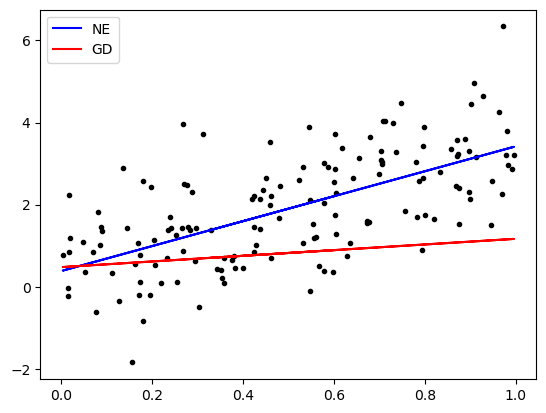

In [155]:
import matplotlib.pyplot as plt
plt.plot(X.iloc[:,1], y, '.k') #산점도
plt.plot(X.iloc[:,1], y_hat_NE, '-b', label = 'NE') #정규방정식
plt.plot(X.iloc[:,1], y_hat_GD, '-r', label = 'GD') #경사하강법
plt.legend()
plt.show()